# The Decision Tree Classification

- Decision Tree Classification is a type of decision tree that is specifically used to classify instances into predefined classes.- 	The model predicts the value of a target variable by learning simple decision rules inferred from the data features
- •	It is a tree-like model where    :
1.	Nodes represent features or attribute    s.
2.	Branches represent decision rul    es.
3.	Leaves represent outcomes or classes.



### Import Libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

## Load & explore the dataset

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## split the dataset

In [6]:
# split dataset in features and target variable
feature = df.drop(columns = 'Outcome') # Features
target = df.Outcome # Target variable

In [7]:
X_train, X_test, y_train, y_test = train_test_split( feature, target, test_size = 0.2, random_state = 0)

## Feature Engineering

In [8]:
# scaling features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
X_train

array([[ 0.90832902,  0.91569367,  0.44912368, ...,  0.37852648,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.75182191, -0.47230103, ..., -0.50667229,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.38763205,  1.06340683, ...,  2.54094063,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.84620959, -0.21634972, ..., -0.94927168,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.12937261,  0.24436264, ..., -0.26640405,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47521786,  0.65388473, ..., -4.07275877,
         0.52121586,  2.94889395]])

In [10]:
X_test

array([[-0.8354355 ,  2.45735903,  0.34674316, ...,  1.35224513,
         2.78594417, -0.96569189],
       [-0.54480808, -0.43719633,  0.24436264, ...,  0.17619533,
        -0.1876381 , -0.88240283],
       [ 0.03644676, -1.41253563, -0.36992051, ...,  0.22677812,
        -0.22668514, -0.71582471],
       ...,
       [ 0.03644676,  0.66399321,  0.85864578, ...,  1.4913478 ,
         0.53623395, -0.96569189],
       [-0.25418066, -0.15403331,  0.24436264, ..., -0.74694053,
        -1.07971278, -0.79911377],
       [-0.8354355 , -0.43719633,  0.14198211, ..., -0.17788417,
         1.06487079, -0.79911377]])

## Model Building

In [33]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)
model


DecisionTreeClassifier()

## Make Predictions

In [34]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [35]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

## Evaluation of model

In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7597402597402597


## Fine Tuning with Max depth

In [40]:
model_max_depth = DecisionTreeClassifier(max_depth = 2)
model_max_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

## make predictions with max depth 

In [41]:
#Predict the response for test dataset
y_pred_max_depth = model.predict(X_test)

## ACCURACY

In [42]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_max_depth))

Accuracy: 0.7597402597402597


## Fine tuning with entrpy & max depth

In [18]:
# Create Decision Tree classifer object
model_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model_entropy = model_entropy.fit(X_train,y_train)
model_entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3)

## make prediction with the entropy and max depth

In [19]:
#Predict the response for test dataset
y_pred_entropy = model_entropy.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy))

Accuracy: 0.7597402597402597


## Evaluation

In [20]:
# evaluate the model
ConfusionMatrix = confusion_matrix(y_test, y_pred)
EvaluationReport = classification_report(y_test, y_pred)
print(ConfusionMatrix)
print(EvaluationReport)

[[89 18]
 [13 34]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       107
           1       0.65      0.72      0.69        47

    accuracy                           0.80       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.81      0.80      0.80       154



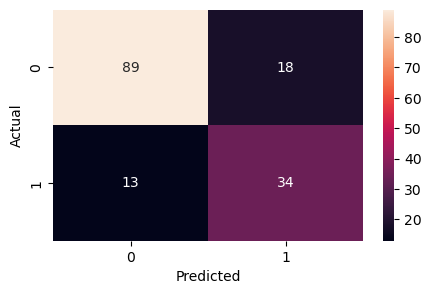

In [21]:
# draw the confusion matrix using heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
# label the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Import Libraries to Visualize Decision Tree

In [22]:
#%pip install graphviz
%pip install pydotplus


Note: you may need to restart the kernel to use updated packages.


## Visualizing Decision Trees

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree


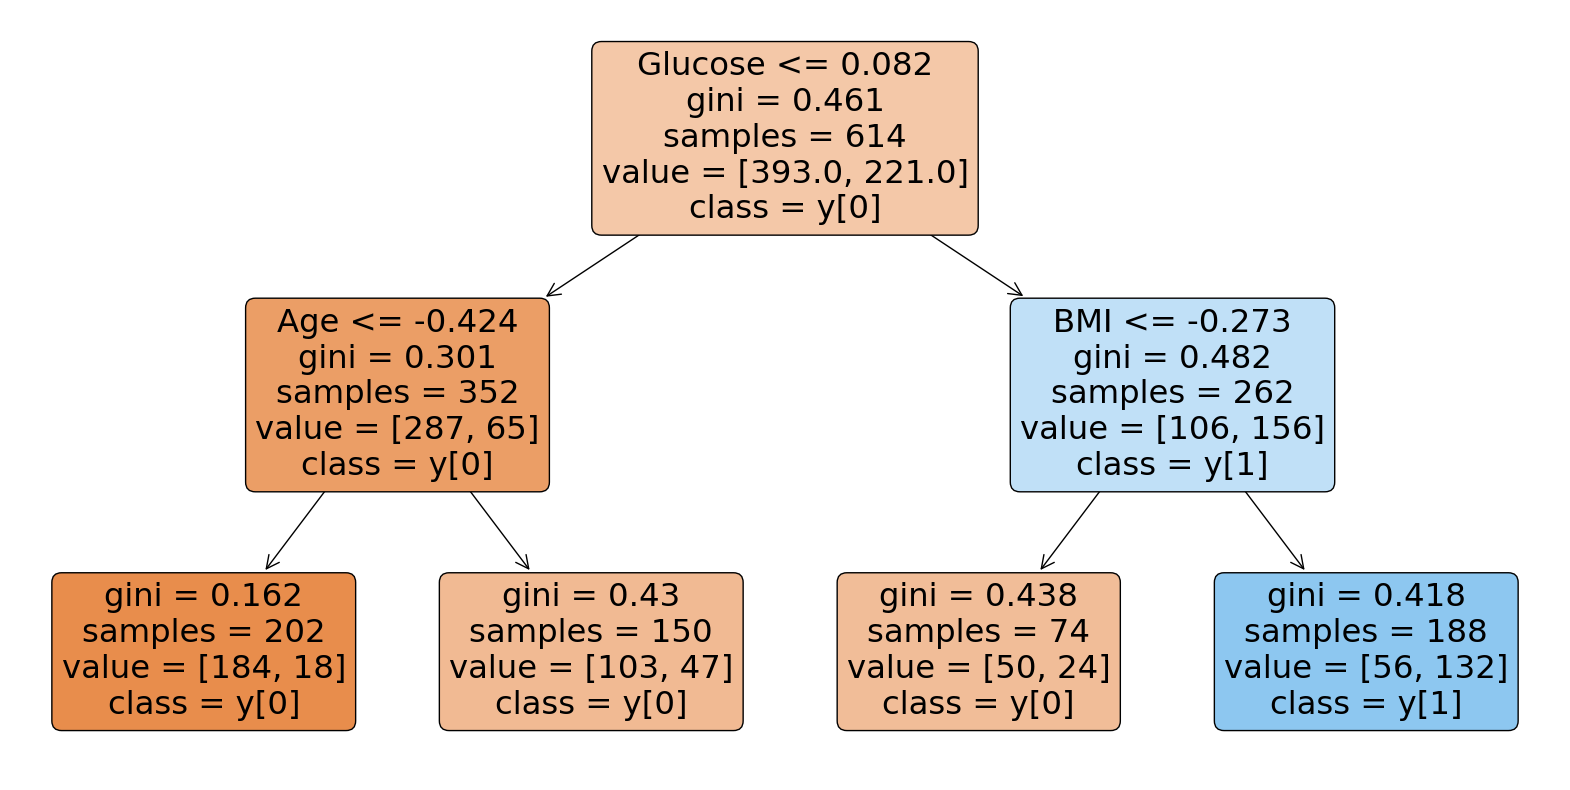

In [43]:
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(model_max_depth, feature_names=feature.columns, class_names=True, filled=True, rounded=True)
plt.show()


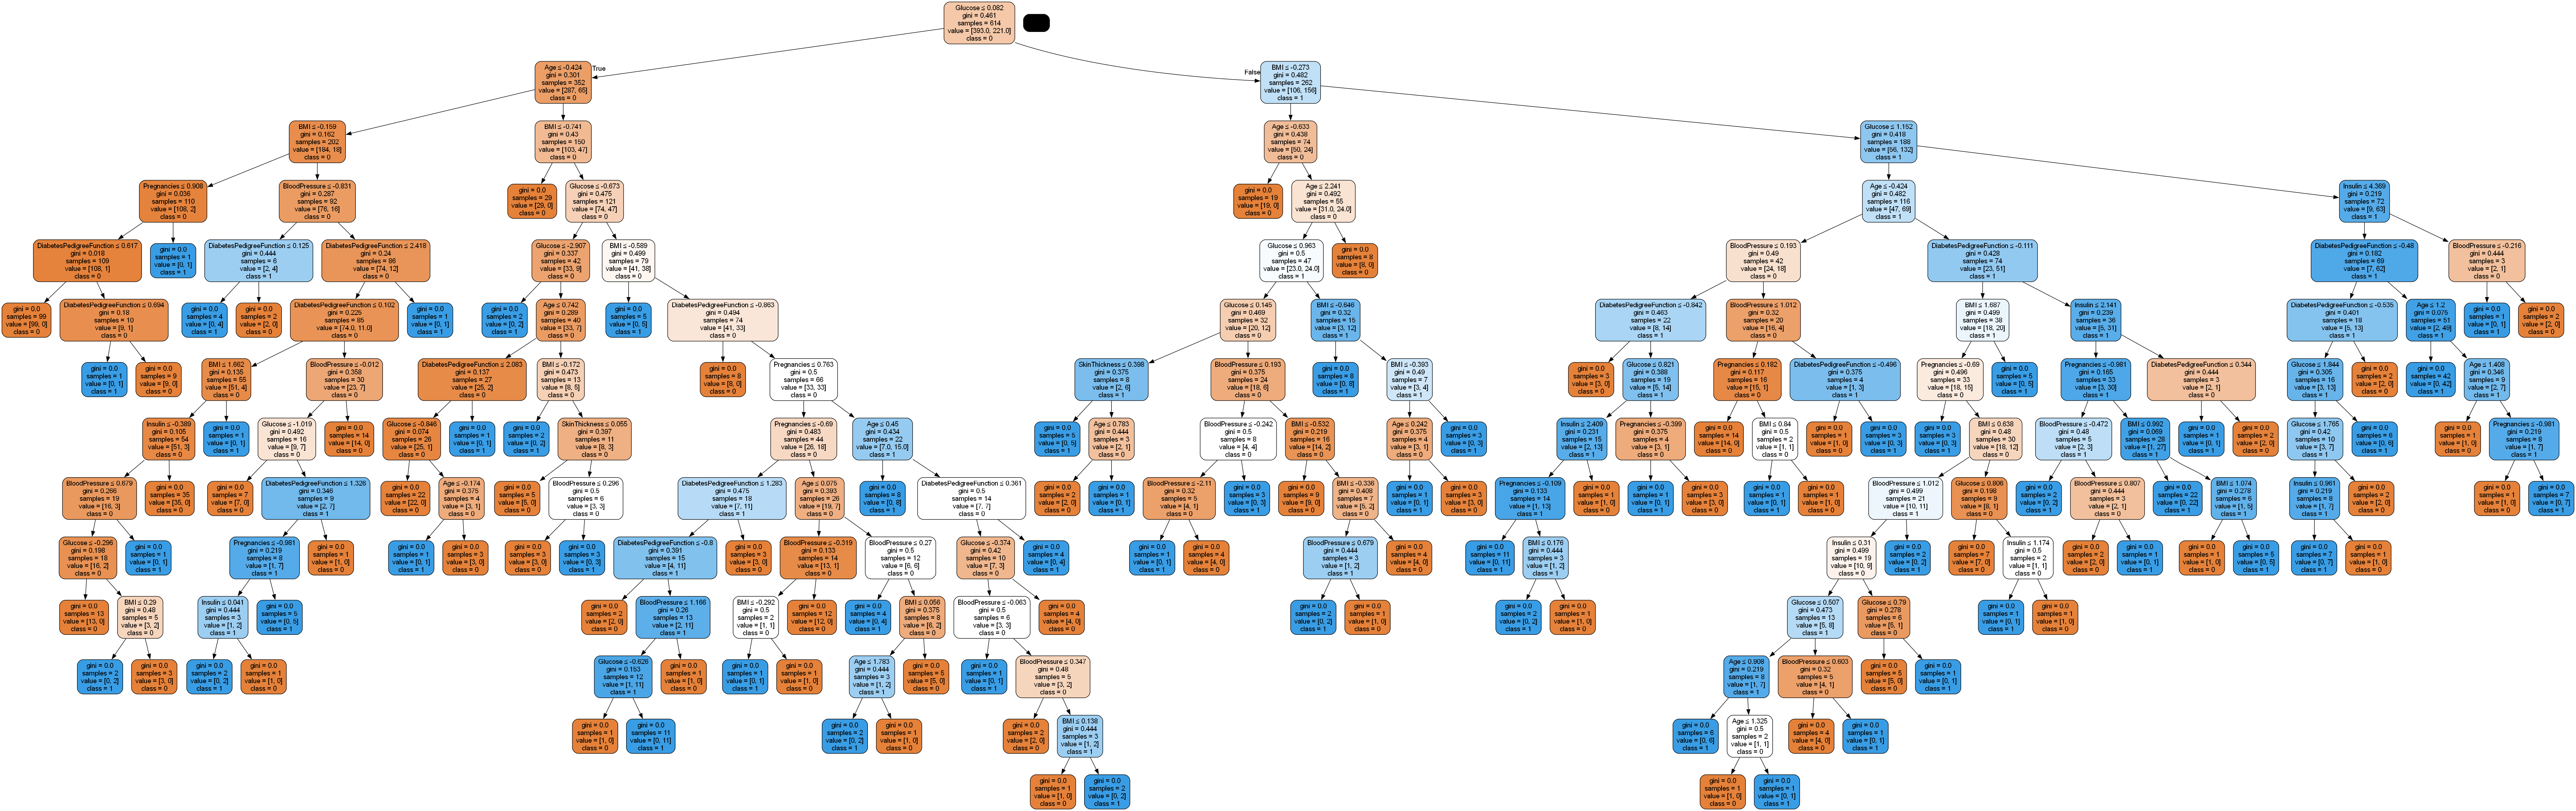

In [39]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
# Display the graph
Image(graph.create_png())



## fine tume model with Gini and max depth

In [47]:
# Create Decision Tree classifer object
model_gini = DecisionTreeClassifier(criterion='gini', max_depth =3 )

# Train Decision Tree Classifer
model_gini = model_gini.fit(X_train,y_train)
model_gini

DecisionTreeClassifier(max_depth=3)

In [48]:
#Predict the response for test dataset
y_pred_gini = model_gini.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))

Accuracy: 0.7597402597402597


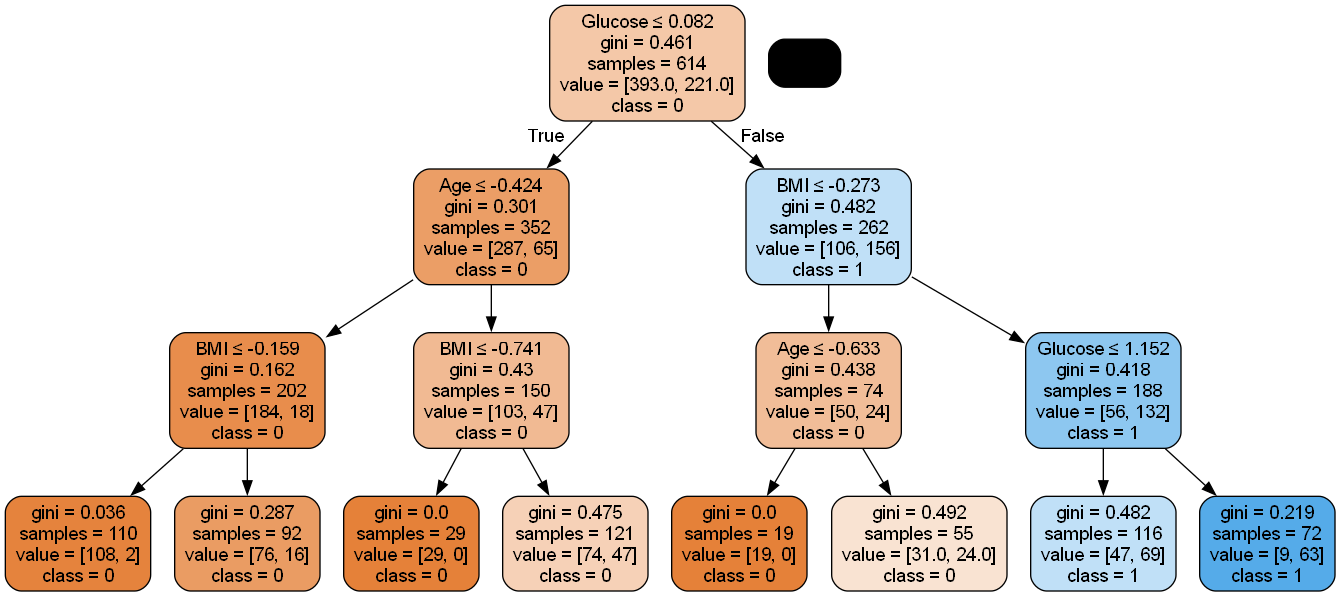

In [49]:
# Export the decision tree to a DOT format
dot_data = StringIO()
export_graphviz(model_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names=feature.columns,
                class_names=['0', '1'])  # Provide class names

# Generate the graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Save the graph as a PNG file
graph.write_png('diabetes.png')

# Display the graph
Image(graph.create_png())


## SUMMARY 

- The model performs well on Class 0 with high precision, recall, and F1-score.
- Class 1 has lower metrics compared to Class 0, indicating that the model is less effective at predicting Class 1.
- The overall accuracy of the model is 80%, which indicates good performance, but there is room for improvement, especially for Class 1.